In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
plt.style.use('seaborn')

### Data Preparation (Generation)

In [3]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

In [4]:
# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


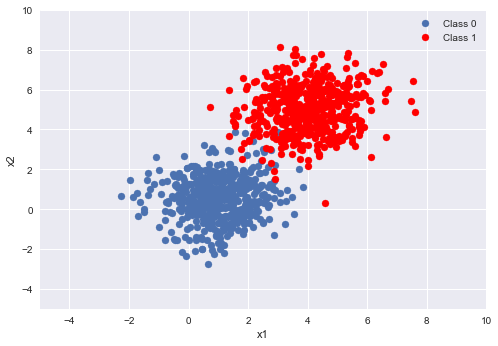

In [6]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [4]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [5]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [6]:
np.random.shuffle(data)
print(data[:10])

[[ 2.63532967 -0.17872576  0.        ]
 [ 0.30772618  0.12308759  0.        ]
 [ 1.60042888  1.81474115  0.        ]
 [ 0.94924773  1.90930509  0.        ]
 [ 0.30317935  2.64491621  0.        ]
 [ 0.02686689 -1.40104812  0.        ]
 [-0.2699474   1.03238474  0.        ]
 [ 3.59672048  3.06732623  1.        ]
 [ 1.41173796  0.95503489  0.        ]
 [ 5.20580489  4.23001804  1.        ]]


In [7]:
split = int(0.8*data.shape[0])
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


In [8]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b):
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    
    return -err/m


def get_grads(y_true,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i]-hx)
        
    
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]


# One Iteration of Gradient Descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [9]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()
print(W)
print(b)


[0.01440278 1.58778412]
4.393518709869633


In [10]:
for i in range(1000):
    l,W,b = grad_descent(X_train,Y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

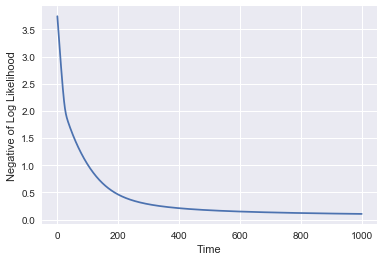

In [11]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

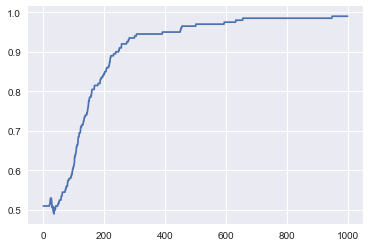

0.99


In [12]:
plt.plot(acc)
plt.show()
print(acc[-1])

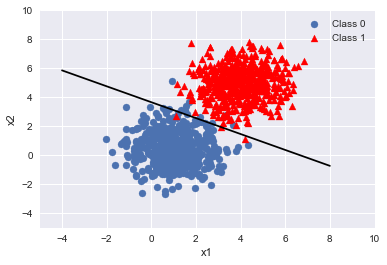

In [13]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()

In [14]:
print(W)
print(b)

[0.67175315 1.22393863]
-4.485223486245892


In [16]:
print(len(loss))

1000
